## Assignment 3: $k$ Nearest Neighbor Nora Wiktorowicz

**Do two questions.**

`! git clone https://github.com/ds4e/knn`

# **Q0.**
**1. What is the difference between regression and classification?**


In machine learning, regression is a statistical method that is utilized when we want to predict numerical or continuous values (such as price). In contrast, classification is used when we want to work with discrete values (yes/no, 2 different categories, etc.).

**2.What is a confusion table? What does it help us understand about a model's performance?**

A confusion table tells us a summary of the performance of the model. It shows us the number of correct versus incorrect predictions in each class. This helps us to understand the model's performance by showing us which part of the model is inaccurate and weakest (meaning it has the highest number of incorrect predicitions). This allows us to adjust the model to improve it, or adjust our interpretations.

**3.What does the SSE quantify about a particular model?**

SSE (sum of squared errors) shows us the difference between observed and predicted values. In other words, it quantifies the variation in the model (the difference between what was actually and observed and what the model predicts). This quantifies the "error" of the model.

**4.What are overfitting and underfitting?**

Overfitting is when a model is too complicated and overtrains on the data used to train it. Then, when new data is introduced, it does not fit the new data and does not have accurate generalizations. Underfitting is when a model is too simple, and does not have accurate or proper generalizations on either the training or test data.

**5.Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?**

Splitting the data into training and test sets, and choosing k by evaluating accuracy or SSE on the test set, improves model performance because it reduces the likelihood for overfitting. Through dividing the data into training and test sets, we are able to first train the model, and then test the model on the test data to ensure that overfitting is not occuring. Therefore, it shows us how the model will work, allowing for repeated testing. It removes any biases in testing how well the model is able to adapt when given new data.  

**6.With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach**

With classification, we can report a class label as a prediction or a probability distribution over class labels. These two approaches both have strengths and weaknesses. Reporting a class label as a prediction is easier to do, more time and cost-effective, and better when the model is confident about a singular classification. However, it also may lead to confusing information (doesn't account for more complex scenarios, such as when different classifications have high similarity in likelihood), and it does not tell us the level of certainty the model has in its classification (which may allow to over-reliance on this data in our analysis). Reporting a class label as a probability distribution over class labels allows us to reflect a more complex/specific interpretation (beyond just the "most likely" classification), and allow us to interpret/analyze the likelihood of each classification (which may lead to a more effective analysis and conclusions with a more well-rounded "big picture"). However, it may be more complex to interpret, timely, and require further interpretation.  

# **Q6.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

***1.Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables. ***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
! git clone https://github.com/ds4e/wrangling

Cloning into 'wrangling'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 66 (delta 10), reused 6 (delta 6), pack-reused 39 (from 1)
Receiving objects: 100% (66/66), 13.84 MiB | 7.50 MiB/s, done.
Resolving deltas: 100% (15/15), done.


In [3]:
df = pd.read_csv('/content/wrangling/assignment/data/airbnb_hw.csv', low_memory = False)
df = df.loc[:, ["Review Scores Rating", "Price", "Beds"]]
print(df.shape, '/n')
df.head()

(30478, 3) /n


,Review Scores Rating,Price,Beds
0,NaN,145,1.0
1,NaN,37,1.0
2,NaN,28,1.0
3,NaN,199,3.0
4,96.0,549,3.0


**2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.**

In [4]:
df_missing_review = df[df["Review Scores Rating"].isnull()]
print(df_missing_review.head())

    Review Scores Rating Price  Beds
0                    NaN   145   1.0
1                    NaN    37   1.0
2                    NaN    28   1.0
3                    NaN   199   3.0
13                   NaN    68   1.0


**3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.**

In [6]:
df = df.dropna(subset=["Review Scores Rating"])
print(df.head())

   Review Scores Rating Price  Beds
4                  96.0   549   3.0
5                 100.0   149   1.0
6                 100.0   250   1.0
7                  94.0    90   1.0
8                  90.0   270   2.0


**4.For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.) ****

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


df["Price"] = pd.to_numeric(df["Price"], errors='coerce')
df["Beds"] = pd.to_numeric(df["Beds"], errors='coerce')
X = df[["Price", "Beds"]]
y = df["Review Scores Rating"]
df = df.dropna()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #split training and testing data 80/20 (recommended by stack overflow and other online resources)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
errors = [] #iterate over reasonable values of k
k_values = range(1, 21)
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    sse = mean_squared_error(y_test, y_pred) * len(y_test)  #get the calculation of our SSE
    errors.append(sse)
optimal_k = k_values[np.argmin(errors)] #find a value that minimizes SSE on the test split using predictions
print(f"Best k: {optimal_k}")
final_knn = KNeighborsRegressor(n_neighbors=optimal_k) #train the model with the most optimal k
final_knn.fit(X_train_scaled, y_train)
final_predictions = final_knn.predict(X_test_scaled)
final_sse = mean_squared_error(y_test, final_predictions) * len(y_test) #test and evaluate the model
print(f"Minimized SSE with k={optimal_k}: {final_sse}")


Best k: 15
Minimized SSE with k=15: 330436.6977777778


You choose K as the value that minimizes the SSE. We did this by iterating over reasonable values of k, testing, and then training the model based on the most optimal value of k (15). Therefore, our model is using 15 nearest neighbors to predict Review Scores Rating.

**5.Predict the missing ratings.**

In [24]:
missing = df_missing_review[["Price", "Beds"]] #using the df_missing_review that I saved above
missing['Price'] = missing['Price'].str.replace(',', '', regex=True).astype(float) #clean to ensure price is numeric
missing = missing.dropna()
missing_scaled = scaler.transform(missing)
filtered_df = df[df["Review Scores Rating"].isnull()]
filtered_df.loc[:, "Review Scores Rating"] = final_knn.predict(missing_scaled)[:len(filtered_df)]
df.update(filtered_df)
print(df.head())


   Review Scores Rating  Price  Beds
4                  96.0  549.0   3.0
5                 100.0  149.0   1.0
6                 100.0  250.0   1.0
7                  94.0   90.0   1.0
8                  90.0  270.0   2.0


<ipython-input-24-9d4ee66c6438>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing['Price'] = missing['Price'].str.replace(',', '', regex=True).astype(float) #clean to ensure price is numeric


In the table above, we see the prediction for the missing ratings. For example, listings with 3 beds are predicted to have a rating of 96, lower than what the output rating may look like for a listing with 1 bed.

**6.Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.**

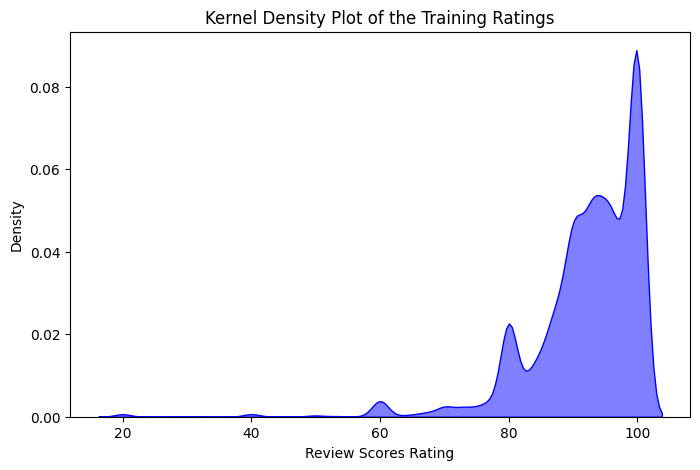

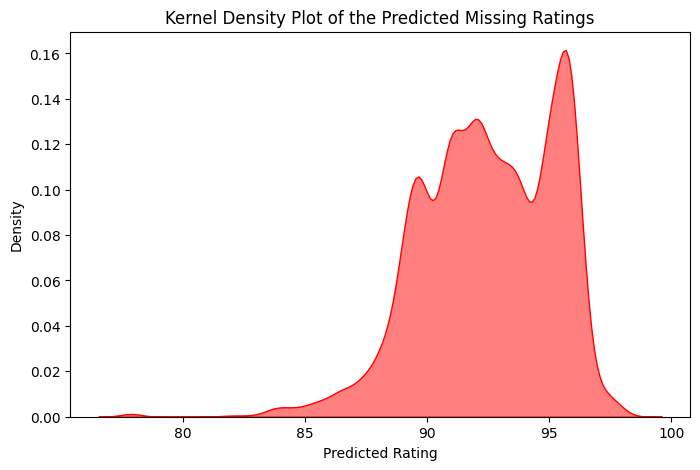

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

#kernel density plot of the training ratings
plt.figure(figsize=(8, 5))
sns.kdeplot(y_train, fill=True, color="blue", alpha=0.5)
plt.title("Kernel Density Plot of the Training Ratings")
plt.xlabel("Review Scores Rating")
plt.ylabel("Density")
plt.show()

#kernel density plot of the predicted missing ratings
predicted_missing_ratings = final_knn.predict(missing_scaled)
plt.figure(figsize=(8, 5))
sns.kdeplot(predicted_missing_ratings, fill=True, color="red", alpha=0.5)
plt.title("Kernel Density Plot of the Predicted Missing Ratings")
plt.xlabel("Predicted Rating")
plt.ylabel("Density")
plt.show()


The plots have a somewhat similar shape, with both skewed left. This shows that, for the most part, more guests left ratings when the ratings were somewhat high/positive. We see that for the kernel density plot of the training ratings, there are the highest density of ratings that are around 100. In contrast, the kernel density plot of predicted missing ratings is a bit more of an even distribution, with the highest density when the predicted ratings are around 96. This may occur for several reasons. For example, the distribution of the missing rating data may be more likely to be missing from less enthusiastic reviews (reflecting in the density peaks around 92 and 96). This causes the predicted rating plot to be shifted towards the left, toward more moderate reviews. This may be because guests that have neither had an atrocious or amazing expirience are less likely to take the time to leave a review.